# WeatherPy
### Moriah Taylor
#### April 24, 2021

-----------------------------------

## Observable Trends - How Latitude Affects Weather
1. There is a strong linear relationship between latitude and maximum temperature in both the Northern Hemisphere (r=-0.897) and the Southern Hemisphere (r=0.785) indicating that the closer a city's latitude is to zero, the higher its maximum temperature.
2. Generally speaking, the closer a city's latitude is to zero, the higher its humidity.
    * There was much more evidence of this in the Northern Hemisphere (r=-0.47) than in the Southern Hemisphere (r=0.15) because (a) there are more cities in the Northern Hemisphere and (b) cities in the Southern Hemisphere have a more limited range of latitudes, from 0 to -60 degrees, whereas the cities in the Northern Hemisphere range from 0 to 80 degrees.
3. There doesn't seem to be a linear relationship between a city's latitude and its cloudiness.
    * This is probably due to the format of the "cloudiness" metric. There is a tendency to use intervals of 10 or 25 to describe cloudiness, so continuity and linearity are more difficult to attain.

### In Conclusion
Cities that are closer to the equator are hotter and more humid. This isn't a surprising trend to see in the data, as it is a well-known fact that the Earth's climate is warmer near the equator because the equator receives more direct sunlight.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

626

### Perform API Calls

In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

#Create lists for latitude, longitude, temp (F), humidity(%), cloudiness(%), wind speed (mph)
lat = []
lng = []
temp = []
hum = []
cloud = []
wind = []
country = []
date = []
cities_final = []

count = 1
sets = 1

# Loop through the list of cities and perform a request for data on each, catch exceptions
print(f'Beginning Data Retrieval \n -----------------------')
for city in cities:
    try:
        print(f'Processing Record {count} of Set {sets} | {city}' )
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        cities_final.append(city)
        count = count + 1
    except KeyError:
        print(f'City not found. Skipping . . .')
    if count == 51: # create sets
        sets = sets + 1
        count = 1 #reset count
        
print(f' ---------------------------- \n Data Retrieval Complete \n ----------------------------')

Beginning Data Retrieval 
 -----------------------
Processing Record 1 of Set 1 | nome
Processing Record 2 of Set 1 | sentyabrskiy
City not found. Skipping . . .
Processing Record 2 of Set 1 | sao filipe
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | ulaangom
Processing Record 5 of Set 1 | maningrida
Processing Record 6 of Set 1 | makinsk
Processing Record 7 of Set 1 | meulaboh
Processing Record 8 of Set 1 | tateyama
Processing Record 9 of Set 1 | mahebourg
Processing Record 10 of Set 1 | catia la mar
Processing Record 11 of Set 1 | khatanga
Processing Record 12 of Set 1 | tuatapere
Processing Record 13 of Set 1 | illoqqortoormiut
City not found. Skipping . . .
Processing Record 13 of Set 1 | mataura
Processing Record 14 of Set 1 | vyazma
Processing Record 15 of Set 1 | buraydah
Processing Record 16 of Set 1 | verkhovazhye
Processing Record 17 of Set 1 | xining
Processing Record 18 of Set 1 | cape town
Processing Record 19 of Set 1 | severo-kurilsk
Processing Re

Processing Record 21 of Set 4 | new norfolk
Processing Record 22 of Set 4 | svetlogorsk
Processing Record 23 of Set 4 | ponta do sol
Processing Record 24 of Set 4 | bilibino
Processing Record 25 of Set 4 | saint anthony
Processing Record 26 of Set 4 | kirakira
Processing Record 27 of Set 4 | kinablangan
Processing Record 28 of Set 4 | coquimbo
Processing Record 29 of Set 4 | malpe
Processing Record 30 of Set 4 | isangel
Processing Record 31 of Set 4 | key west
Processing Record 32 of Set 4 | tuggurt
City not found. Skipping . . .
Processing Record 32 of Set 4 | butaritari
Processing Record 33 of Set 4 | sistranda
Processing Record 34 of Set 4 | grand river south east
City not found. Skipping . . .
Processing Record 34 of Set 4 | pervomayskoye
Processing Record 35 of Set 4 | port macquarie
Processing Record 36 of Set 4 | asyut
Processing Record 37 of Set 4 | rawson
Processing Record 38 of Set 4 | alamogordo
Processing Record 39 of Set 4 | noumea
Processing Record 40 of Set 4 | vredendal

Processing Record 47 of Set 7 | mazyr
Processing Record 48 of Set 7 | ruatoria
City not found. Skipping . . .
Processing Record 48 of Set 7 | soria
Processing Record 49 of Set 7 | bryan
Processing Record 50 of Set 7 | okhotsk
Processing Record 1 of Set 8 | swift current
Processing Record 2 of Set 8 | leo
Processing Record 3 of Set 8 | wuan
Processing Record 4 of Set 8 | pychas
Processing Record 5 of Set 8 | sechura
Processing Record 6 of Set 8 | victoria point
Processing Record 7 of Set 8 | leningradskiy
Processing Record 8 of Set 8 | gasa
Processing Record 9 of Set 8 | kautokeino
Processing Record 10 of Set 8 | gouyave
Processing Record 11 of Set 8 | vanimo
Processing Record 12 of Set 8 | labis
Processing Record 13 of Set 8 | sholapur
Processing Record 14 of Set 8 | juifang
City not found. Skipping . . .
Processing Record 14 of Set 8 | miandrivazo
Processing Record 15 of Set 8 | talnakh
Processing Record 16 of Set 8 | yanam
Processing Record 17 of Set 8 | havelock
Processing Record 18

Processing Record 19 of Set 11 | nhamunda
Processing Record 20 of Set 11 | jomalig
City not found. Skipping . . .
Processing Record 20 of Set 11 | bharatpur
Processing Record 21 of Set 11 | camopi
Processing Record 22 of Set 11 | yelizovo
Processing Record 23 of Set 11 | buchanan
Processing Record 24 of Set 11 | spirit river
Processing Record 25 of Set 11 | iwaki
Processing Record 26 of Set 11 | berlevag
Processing Record 27 of Set 11 | baoding
Processing Record 28 of Set 11 | mosquera
Processing Record 29 of Set 11 | date
Processing Record 30 of Set 11 | auki
Processing Record 31 of Set 11 | yarmouth
Processing Record 32 of Set 11 | whitehorse
Processing Record 33 of Set 11 | askiz
Processing Record 34 of Set 11 | agva
City not found. Skipping . . .
Processing Record 34 of Set 11 | selishche
Processing Record 35 of Set 11 | paucartambo
City not found. Skipping . . .
Processing Record 35 of Set 11 | tilichiki
Processing Record 36 of Set 11 | ibotirama
Processing Record 37 of Set 11 | e

### Convert Raw Data to DataFrame

In [5]:
#create dictionary
city_dict = {
    "City": cities_final,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": temp,
    "Humidity": hum,
    "Cloudiness": cloud,
    "Wind Speed": wind,
    "Country": country,
    "Date": date
}
#convert to pandas dataframe
city_df = pd.DataFrame(city_dict)
#export to csv
city_df.to_csv("output_data/cities.csv", index=False)

#display dataframe
city_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,nome,64.5011,-165.4064,39.20,70,1,4.61,US,1619310689
1,sao filipe,14.8961,-24.4956,72.63,73,7,10.87,CV,1619310648
2,hermanus,-34.4187,19.2345,62.01,82,100,4.00,ZA,1619311132
3,ulaangom,49.9811,92.0667,36.18,36,66,16.51,MN,1619311244
4,maningrida,-12.0667,134.2667,83.03,55,18,8.46,AU,1619311244
5,makinsk,52.6292,70.4169,40.84,49,100,12.57,KZ,1619311244
6,meulaboh,4.1363,96.1285,76.91,83,79,2.55,ID,1619310837
7,tateyama,34.9833,139.8667,64.99,59,75,13.80,JP,1619311245
8,mahebourg,-20.4081,57.7000,78.80,78,75,12.66,MU,1619310801
9,catia la mar,10.6038,-67.0303,82.40,74,74,3.44,VE,1619311245


In [6]:
#summary stats
city_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02
mean,19.872338,21.683767,60.778663,68.640625,53.293403,7.739149,1.619311e+09
std,33.321901,90.444762,19.027728,21.653581,40.300424,4.977820,2.754412e+02
min,-54.800000,-179.166700,5.140000,8.000000,0.000000,0.180000,1.619310e+09
25%,-8.401000,-58.910275,44.355000,58.000000,9.000000,3.985000,1.619311e+09
50%,22.262450,26.230550,63.905000,73.000000,57.500000,6.910000,1.619311e+09
75%,49.335650,100.340125,78.257500,84.000000,97.000000,10.360000,1.619311e+09
max,78.218600,178.416700,93.250000,100.000000,100.000000,29.930000,1.619311e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [17]:
print(city_df[city_df['Humidity']>100])
print(f'The maximum humidity measure in the dataset is {max(city_df["Humidity"])}')

Empty DataFrame
Columns: [City, Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed, Country, Date]
Index: []
The maximum humidity measure in the dataset is 100


There are no cities with humidity over 100% in my dataframe, so there wasn't any cleaning that needed to be done.

## Plotting the Data

## Latitude vs. Temperature Plot

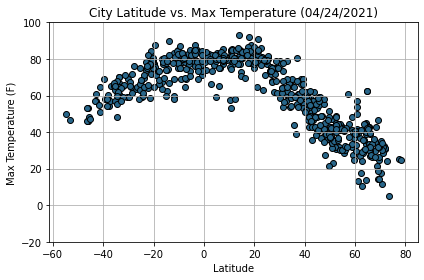

In [18]:
#scatterplot latitude vs. max temp
x_values = city_df['Lat']
y_values = city_df['Max Temp']
y_ticks = np.arange(-20, 120, 20)
x_ticks = np.arange(-60, 100, 20)

#plot
plt.scatter(x_values,y_values, marker="o", c="#28668a", edgecolors="black")
#labels
plt.title('City Latitude vs. Max Temperature (04/24/2021)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.xticks(x_ticks)
plt.yticks(y_ticks)
plt.grid()

plt.tight_layout()
#save as png
plt.savefig("images/lat_vs_maxtemp.png")

#show plot
plt.show()

## Latitude vs. Humidity Plot

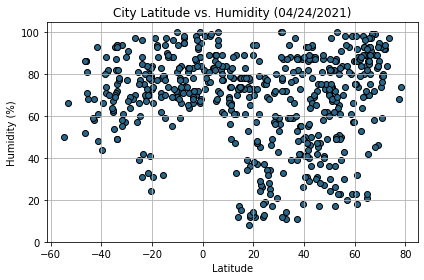

In [19]:
#scatterplot latitude vs. humidity
x_values = city_df['Lat']
y_values = city_df['Humidity']
y_ticks = np.arange(0, 120, 20)
x_ticks = np.arange(-60, 100, 20)

#plot
plt.scatter(x_values,y_values, marker="o", c="#28668a", edgecolors="black")
#labels
plt.title('City Latitude vs. Humidity (04/24/2021)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.xticks(x_ticks)
plt.yticks(y_ticks)
plt.grid()

plt.tight_layout()
#save as png
plt.savefig("images/lat_vs_humidity.png")

#show plot
plt.show()

## Latitude vs. Cloudiness Plot

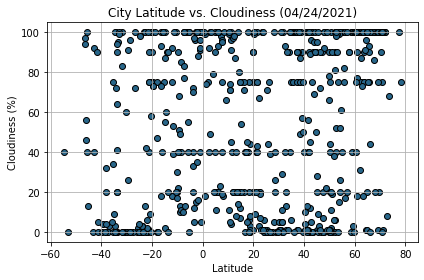

In [20]:
#scatterplot latitude vs. humidity
x_values = city_df['Lat']
y_values = city_df['Cloudiness']
y_ticks = np.arange(0, 120, 20)
x_ticks = np.arange(-60, 100, 20)

#plot
plt.scatter(x_values,y_values, marker="o", c="#28668a", edgecolors="black")
#labels
plt.title('City Latitude vs. Cloudiness (04/24/2021)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.xticks(x_ticks)
plt.yticks(y_ticks)
plt.grid()

plt.tight_layout()
#save as png
plt.savefig("images/lat_vs_cloudiness.png")

#show plot
plt.show()

## Latitude vs. Wind Speed Plot

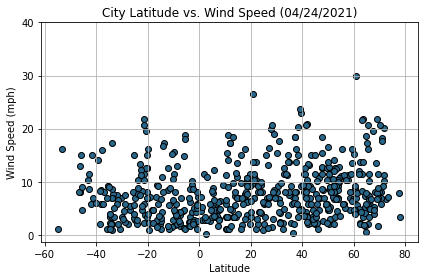

In [24]:
#scatterplot latitude vs. humidity
x_values = city_df['Lat']
y_values = city_df['Wind Speed']
y_ticks = np.arange(0, 50, 10)
x_ticks = np.arange(-60, 100, 20)

#plot
plt.scatter(x_values,y_values, marker="o", c="#28668a", edgecolors="black")
#labels
plt.title('City Latitude vs. Wind Speed (04/24/2021)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.xticks(x_ticks)
plt.yticks(y_ticks)
plt.grid()

plt.tight_layout()
#save as png
plt.savefig("images/lat_vs_wind.png")

#show plot
plt.show()

## Linear Regression

In [22]:
#separate into northern and southern hemispheres
northern_df = city_df[city_df['Lat'] >= 0]
southern_df = city_df[city_df['Lat'] < 0 ]

####  Northern Hemisphere - Latitude vs. Max Temp Linear Regression 

The r-value is: -0.8966413956582893


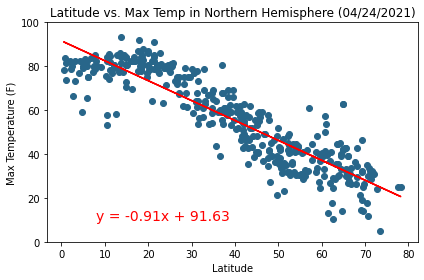

In [23]:
#scatterplot latitude vs. max temp
#NORTHERN HEMISPHERE
x_values = northern_df['Lat']
y_values = northern_df['Max Temp']
y_ticks = np.arange(0, 120, 20)
x_ticks = np.arange(0, 90, 10)

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print r value
print(f'The r-value is: {rvalue}')

#scatterplot
plt.scatter(x_values,y_values, marker="o", c="#28668a")
#regression line
plt.plot(x_values, regress_values, color="red")
#labels
plt.title('Latitude vs. Max Temp in Northern Hemisphere (04/24/2021)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.xticks(x_ticks)
plt.yticks(y_ticks)
#add regression equation
plt.annotate(line_eq, (8,10), fontsize=14, color="red")

plt.tight_layout()
#save as png
plt.savefig("images/northern_lat_vs_maxtemp_regress.png")

#show plot
plt.show()

####  Southern Hemisphere - Latitude vs. Max Temp Linear Regression

The r-value is: 0.7846206208006665


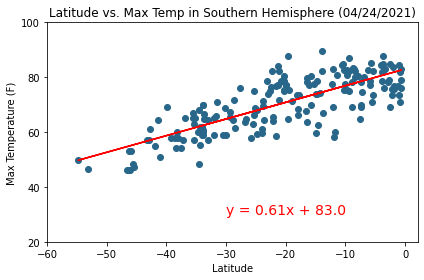

In [25]:
#scatterplot latitude vs. max temp
#SOUTHERN HEMISPHERE
x_values = southern_df['Lat']
y_values = southern_df['Max Temp']
y_ticks = np.arange(20, 120, 20)
x_ticks = np.arange(-60, 10, 10)

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print r value
print(f'The r-value is: {rvalue}')

#scatterplot
plt.scatter(x_values,y_values, marker="o", c="#28668a")
#regression line
plt.plot(x_values, regress_values, color="red")
#labels
plt.title('Latitude vs. Max Temp in Southern Hemisphere (04/24/2021)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.xticks(x_ticks)
plt.yticks(y_ticks)
#add regression equation
plt.annotate(line_eq, (-30,30), fontsize=14, color="red")

plt.tight_layout()
#save as png
plt.savefig("images/southern_lat_vs_maxtemp_regress.png")

#show plot
plt.show()

####  Northern Hemisphere - Latitude vs. Humidity (%) Linear Regression

The r-value is: 0.12318159149275257


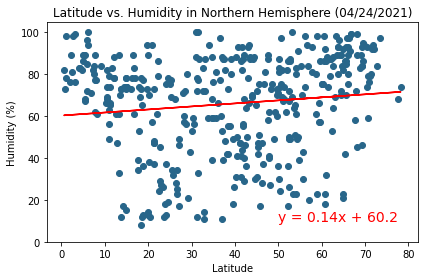

In [26]:
#scatterplot latitude vs. humidity
#NORTHERN HEMISPHERE
x_values = northern_df['Lat']
y_values = northern_df['Humidity']
y_ticks = np.arange(0, 120, 20)
x_ticks = np.arange(0, 90, 10)

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print r value
print(f'The r-value is: {rvalue}')

#scatterplot
plt.scatter(x_values,y_values, marker="o", c="#28668a")
#regression line
plt.plot(x_values, regress_values, color="red")
#labels
plt.title('Latitude vs. Humidity in Northern Hemisphere (04/24/2021)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.xticks(x_ticks)
plt.yticks(y_ticks)
#add regression equation
plt.annotate(line_eq, (50,10), fontsize=14, color="red")

plt.tight_layout()
#save as png
plt.savefig("images/northern_lat_vs_humidity_regress.png")

#show plot
plt.show()

####  Southern Hemisphere - Latitude vs. Humidity (%) Linear Regression

The r-value is: 0.2326714410462909


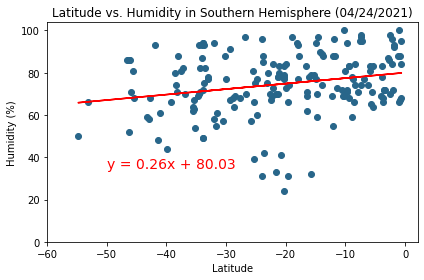

In [27]:
#scatterplot latitude vs. humidity
#SOUTHERN HEMISPHERE
x_values = southern_df['Lat']
y_values = southern_df['Humidity']
y_ticks = np.arange(0, 110, 20)
x_ticks = np.arange(-60, 10, 10)

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print r value
print(f'The r-value is: {rvalue}')

#scatterplot
plt.scatter(x_values,y_values, marker="o", c="#28668a")
#regression line
plt.plot(x_values, regress_values, color="red")
#labels
plt.title('Latitude vs. Humidity in Southern Hemisphere (04/24/2021)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.xticks(x_ticks)
plt.yticks(y_ticks)
#add regression equation
plt.annotate(line_eq, (-50,35), fontsize=14, color="red")

plt.tight_layout()
#save as png
plt.savefig("images/southern_lat_vs_humidity_regress.png")

#show plot
plt.show()

##### A Closer Look at the Equator

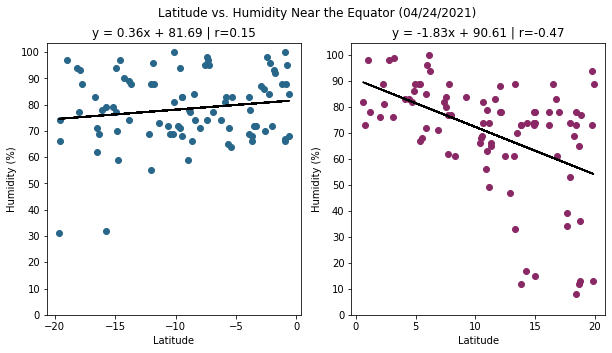

In [42]:
#separate area by equator into north and south
equator_north = northern_df[northern_df['Lat']<20]
equator_south = southern_df[southern_df['Lat']>-20]

#x and y values
x_values1 = equator_south['Lat']
y_values1 = equator_south['Humidity']
x_values2 = equator_north['Lat']
y_values2 = equator_north['Humidity']
#x ticks and y ticks
x_ticks2 = np.arange(0,25,5)
x_ticks1 = np.arange(-20,5,5)
y_ticks = np.arange(0,110,10)

fig, (ax1,ax2) = plt.subplots(1, 2)

#title 
fig.suptitle('Latitude vs. Humidity Near the Equator (04/24/2021)')

##SOUTHERN HEMISPHERE##
#linear regression model
(slope1, intercept1, rvalue1, pvalue1, stderr1) = linregress(x_values1, y_values1)
regress_values1 = x_values1*slope1 + intercept1
line_eq1 = "y = " + str(round(slope1,2)) + "x + " + str(round(intercept1,2)) + ' | r=' + str(round(rvalue1,2))

#scatterplot
ax1.scatter(x_values1,y_values1, marker="o", c="#28668a")
#regression line
ax1.plot(x_values1, regress_values1, color="black")
#labels
ax1.set_xlabel('Latitude')
ax1.set_ylabel('Humidity (%)')
ax1.set_xticks(x_ticks1)
ax1.set_yticks(y_ticks)
#add regression equation
ax1.set_title(line_eq1)
          
##NORTHERN HEMISPHERE##
#linear regression model
(slope2, intercept2, rvalue2, pvalue2, stderr2) = linregress(x_values2, y_values2)
regress_values2 = x_values2*slope2 + intercept2
line_eq2 = "y = " + str(round(slope2,2)) + "x + " + str(round(intercept2,2)) + ' | r=' + str(round(rvalue2,2))

#scatterplot
ax2.scatter(x_values2,y_values2, marker="o", c="#8a2866")
#regression line
ax2.plot(x_values2, regress_values2, color="black")
#labels
ax2.set_xlabel('Latitude')
ax2.set_ylabel('Humidity (%)')
ax2.set_xticks(x_ticks2)
ax2.set_yticks(y_ticks)
#add regression equation
ax2.set_title(line_eq2)

#size
fig.set_size_inches(10,5)

#save as png
plt.savefig("images/lat_vs_humidity_regress_equator.png")
#show plot
plt.show()

The relationship between city latitude and humidity is much weaker in the Southern Hemisphere than in the Northern Hemisphere. This is probably due to the fact that there are less major cities in the Southern Hemisphere so there is less data, which means a more significant relationship can't be determined. Another reason for the Northern Hemisphere having more data is that it has a wider range of latitudes (up to 80 degrees compared to the Southern Hemisphere which only has cities as deep as -60 degrees latitude).

####  Northern Hemisphere - Latitude vs. Cloudiness (%) Linear Regression

The r-value is: 0.20522591447386965


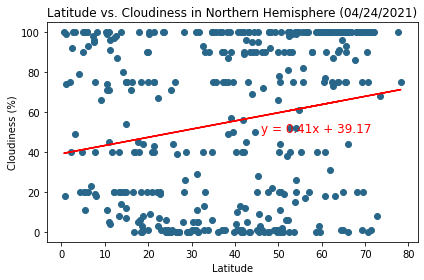

In [43]:
#scatterplot latitude vs. cloudiness
#NORTHERN HEMISPHERE
x_values = northern_df['Lat']
y_values = northern_df['Cloudiness']
y_ticks = np.arange(0, 120, 20)
x_ticks = np.arange(0, 90, 10)

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print r value
print(f'The r-value is: {rvalue}')

#scatterplot
plt.scatter(x_values,y_values, marker="o", c="#28668a")
#regression line
plt.plot(x_values, regress_values, color="red")
#labels
plt.title('Latitude vs. Cloudiness in Northern Hemisphere (04/24/2021)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.xticks(x_ticks)
plt.yticks(y_ticks)
#add regression equation
plt.annotate(line_eq, (46,50), fontsize=12, color="red")

plt.tight_layout()
#save as png
plt.savefig("images/northern_lat_vs_cloudiness_regress.png")

#show plot
plt.show()

####  Southern Hemisphere - Latitude vs. Cloudiness (%) Linear Regression

The r-value is: 0.24665983963997287


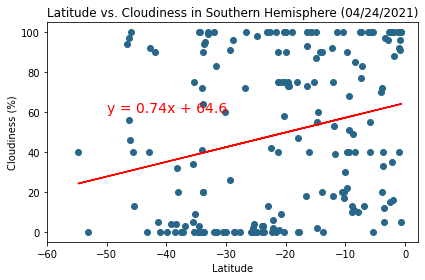

In [44]:
#scatterplot latitude vs. cloudiness
#SOUTHERN HEMISPHERE
x_values = southern_df['Lat']
y_values = southern_df['Cloudiness']
y_ticks = np.arange(0, 120, 20)
x_ticks = np.arange(-60, 10, 10)

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print r value
print(f'The r-value is: {rvalue}')

#scatterplot
plt.scatter(x_values,y_values, marker="o", c="#28668a")
#regression line
plt.plot(x_values, regress_values, color="red")
#labels
plt.title('Latitude vs. Cloudiness in Southern Hemisphere (04/24/2021)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.xticks(x_ticks)
plt.yticks(y_ticks)
#add regression equation
plt.annotate(line_eq, (-50,60), fontsize=14, color="red")

plt.tight_layout()
#save as png
plt.savefig("images/southern_lat_vs_cloudiness_regress.png")

#show plot
plt.show()

####  Northern Hemisphere - Latitude vs. Wind Speed (mph) Linear Regression

The r-value is: 0.15781768067824467


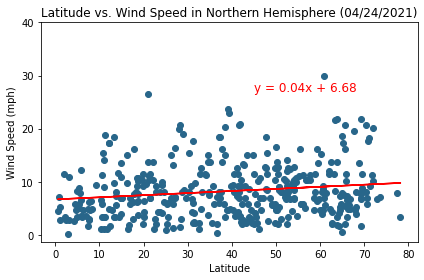

In [45]:
#scatterplot latitude vs. wind speed
#NORTHERN HEMISPHERE
x_values = northern_df['Lat']
y_values = northern_df['Wind Speed']
y_ticks = np.arange(0, 50, 10)
x_ticks = np.arange(0, 90, 10)

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print r value
print(f'The r-value is: {rvalue}')

#scatterplot
plt.scatter(x_values,y_values, marker="o", c="#28668a")
#regression line
plt.plot(x_values, regress_values, color="red")
#labels
plt.title('Latitude vs. Wind Speed in Northern Hemisphere (04/24/2021)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.xticks(x_ticks)
plt.yticks(y_ticks)
#add regression equation
plt.annotate(line_eq, (45,27), fontsize=12, color="red")

plt.tight_layout()
#save as png
plt.savefig("images/northern_lat_vs_wind_regress.png")

#show plot
plt.show()

####  Southern Hemisphere - Latitude vs. Wind Speed (mph) Linear Regression

The r-value is: -0.13420883779578174


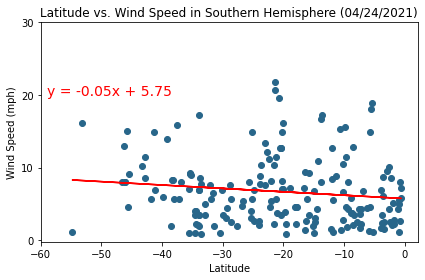

In [46]:
#scatterplot latitude vs. wind speed
#SOUTHERN HEMISPHERE
x_values = southern_df['Lat']
y_values = southern_df['Wind Speed']
y_ticks = np.arange(0, 40, 10)
x_ticks = np.arange(-60, 10, 10)

#linear regression model
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values*slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#print r value
print(f'The r-value is: {rvalue}')

#scatterplot
plt.scatter(x_values,y_values, marker="o", c="#28668a")
#regression line
plt.plot(x_values, regress_values, color="red")
#labels
plt.title('Latitude vs. Wind Speed in Southern Hemisphere (04/24/2021)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.xticks(x_ticks)
plt.yticks(y_ticks)
#add regression equation
plt.annotate(line_eq, (-59,20), fontsize=14, color="red")

plt.tight_layout()
#save as png
plt.savefig("images/southern_lat_vs_wind_regress.png")

#show plot
plt.show()